<a href="https://colab.research.google.com/github/hecangbei/Brayns/blob/master/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introducing to regression with neural networks in TensorFlow

In [46]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.0


Creating data to view and fit

In [47]:
import numpy as np
from matplotlib import pyplot as plt

# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

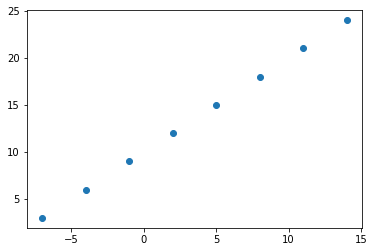

In [48]:
# Visualize it
plt.scatter(x, y)

In [49]:
y == x + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

Input and output shapes


In [50]:
# Create a demo for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [51]:
x[0], y[0]

(-7.0, 3.0)

In [52]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [53]:
x = tf.constant(x)
y = tf.constant(y)
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [54]:
inut_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), TensorShape([]))

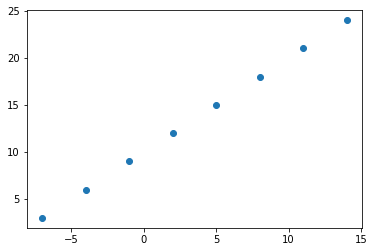

In [55]:
plt.scatter(x, y)

Steps in modeling TensorFlow
1. **Creating a model**-define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling model**-define the loss function (in other words, the function which tells our model how wrong it is) and the model how to improve the pattern its learning) and evaluation metrics (what we can use to interpret the performance
3. **Fitting a model**-letting the model try to find patterns between X & y (features and labels).

Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimaization function or perphaps the **learning rate** of the optimation function.
3. **fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [56]:
# create a new data 
tf.random.set_seed(42)
x = tf.random.uniform(shape=[50])
x

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [57]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(x, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

ValueError: ignored

In [ ]:
x, y

In [ ]:
model.predict([17.0])

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
      optimizer=tf.keras.optimizers.SGD(),
      metrics=["mae"])
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

In [ ]:
x, y

In [ ]:
model.predict([17.0])

### **Evaluating a model** **加粗文字**

In [ ]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

In [ ]:
# Make labels for the dataset
y = np.arange(-90, 110, 4)
y

# **Since y=X + 10, we could make the labels like so:**

In [ ]:
y = X + 10
y

# **Split data into training/test set**

In [ ]:
# Check how many samples we have
len(X)

In [ ]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples
y_train = y[:40] 
X_test = X[40:] # last 10 samples
y_test = y[40:]
len(X_train), len(X_test)

# **Visualizing the data**

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show legend():
plt.legend()

In [ ]:
# Set random seed
tf.random.set_seed(43)
# Creat a model
model = tf.keras.Sequential([
   tf.keras.layers.Dense(1, input_shape=[1])   
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
      optimizer=tf.keras.optimizers.SGD(),
      metrics=["mae"])

# Fit model
model.fit(X_train, y_train, epochs=100)

# **Visualizing the model**

After you built a model, you might want to take a look at it (espetially you haven't built many before).
You can take a look at layers and shapes of your model by caling summary() on it.

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

# **Visualizing the predictions**

In [ ]:
# Make predictions
y_preds = model.predict(X_test)

In [ ]:
# View the predictions
y_preds

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  ### Plots training data, test data and comapres predictions.

  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()

In [ ]:
plot_predictions(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_preds)

In [ ]:
# Evaulate the model on the test set
model.evaluate(X_test, y_test)

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds)
mae

In [ ]:
y_test

In [ ]:
y_preds

In [ ]:
y_test.shape, y_preds.shape

# **㊙ Note:** If you're comparing two tensors, it's important to make sure they're the right shape(s)(you won't always have to manipulate the shapes, but always on the look out, many errors are the results of mismatched tensors,especially mismatched input and output shapes)

In [ ]:
# Shape before squeeze()
y_preds.shape

In [ ]:
# Shape after squeeze()
y_preds.squeeze().shape

In [ ]:
y_test, y_preds.squeeze()

In [ ]:
# Calculate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds.squeeze())
mae

In [ ]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_preds.squeeze())
mse

It's a good idea to functionize anything you think you might use over again
Make funtions for evaluation metrics

In [ ]:
def mae(y_test, y_pred):
  return tf.metrics.mean_absolute_error(y_test, y_pred)

def mse(y_test, y_pred):
  return tf.metrics.mean_squared_error(y_test, y_pred)

# **Running experiments to improve model**
1. Get more data
2. Make model larger
3. Train for longer

build 3 models and compare their results:

1. model_1 - same as original model, 1 layer, trained for 100 epochs.
2. model_2 - 2 layers, trained for 100 epochs.
3. model_3 - 2 layers, trained for 500 epochs.

# **Build model_1**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# Comile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

## **Build model_2**
This time add an extra dense layer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([tf.keras.layers.Dense(1),
tf.keras.layers.Dense(1)])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output


In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

# **Build model_3**
For the 3rd model, keep everything the same as model_2 except.
 
This time train for longer (500 epochs instead of 100)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([tf.keras.layers.Dense(1),
                              tf.keras.layers.Dense(1)])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

In [ ]:
# Make and plot predictioins for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy
mae_3, mse_3

# **Comparing results**

In [ ]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

## **Tracking experiments**
one really good habit to get into is tracking your modelling experiments to see which perform better than others.

📑Resource:


*  TensorBoard - a component of TensorFlow library to help track modelling experiments
*  


# **Saving a model**

1. The SavedModel format (default)
2. The HDF5 format

In [ ]:
# Save a model using the SavedModel format
model_2.save('best_model_savedModel_format')

In [ ]:
# check it out - output a protobuf binary file (.pb) as well as other files
!ls best_model_savedModel_format

In [ ]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

In [ ]:
# Check it out
!ls best_model_HDF5_format.h5

# **Loading a model**
Load a saved model using the load_model() method.
Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).


In [ ]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_savedModel_format")
loaded_saved_model.summary()

# Compare model_2 with the savedModel version (should return True)


```
# 此内容为代码格式
```



In [ ]:
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy

In [ ]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

In [ ]:
# Compare model_2 with the loaded HDF5 version (Should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy == mae(y_test, model_2_preds.squeeze()).numpy()

# **Downloading a model (from Google Colab)**
Get model from Google Colab to your local machine, you can do one of  the following things:


*  Right click on the file in the files pane and click 'download'. 
*  Use the code below




In [ ]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

# **A larger example**

To predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region.


In [78]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [79]:
# Read required libraries
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [80]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs) using the get_dummies() method in pandas.

In [81]:
# Turn all categaries into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Split data into features (X) and labels (y).

In [82]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [83]:
# View features
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [84]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # set random state for reproducible splits

# Build and fit a model

In [85]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([tf.keras.layers.Dense(1),
tf.keras.layers.Dense(1)])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8868.5918 - mae: 8868.5918
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7887.1606 - mae: 7887.1606
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7537.0947 - mae: 7537.0947
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7859.4336 - mae: 7859.4336
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7639.6699 - mae: 7639.6699
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7578.0859 - mae: 7578.0859
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7514.6172 - mae: 7514.6172
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7694.1338 - mae: 7694.1338
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.9136 - mae: 7595.9136
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7735.9116 - mae: 7735.9116

In [86]:
# Check the results of the insuance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8628.2393 - mae: 8628.2393


[8628.2392578125, 8628.2392578125]

Model didn't perform well, try 3 things:


*   Increasing the number of layers (2-3)
*   Increasing the number of units in each layer (except for the output layer)


*   Changing the optimizer (from SGD to Adam)






In [87]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase the number of units
insurance_model_2 = tf.keras.Sequential([tf.keras.layers.Dense(100),
                                        tf.keras.layers.Dense(10),
                                        tf.keras.layers.Dense(1)])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [88]:
# Evaluate the model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

Text(0.5, 0, 'epochs')

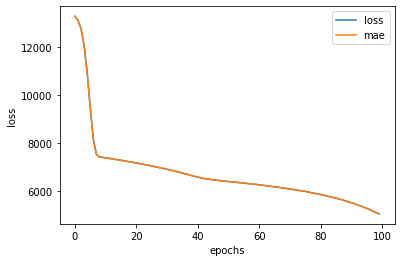

In [89]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [90]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [91]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 3494.7285 - mae: 3494.7285


(3494.728515625, 3494.728515625)

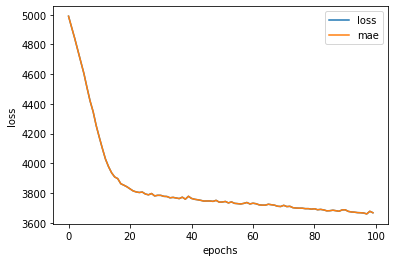

In [92]:
# Plot the model trained for total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will show 100 since we overrid the history variable

# **Preprocessing data (normalization and standardization)**
A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called normalization (salling all values from their original ranges to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process called standardizaiton which converts all of your data to unit variace and 0 mean.

These two practices are often part of a preprocessing pepeline ( a series of functions to prepare your data for use with neural networks).

Some of the major steps to preprocess data for a neural network include:



*   Turning all data to numbers (a neural network can't handle strings).


*   Making sure the data is in right shape (verifing input and output shapes).

*   Feature scaling:



       *  Normalizing data (make sure all values are between 0 and 1). This is done by substracting the minimum value then dividing by the maximum value minus the minimum.This is also referred to as min-max scaling.  
*   列表项






*   列表项




In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [94]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [97]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help to normalize/preprocess the data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with naormalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [98]:
# Nononormalized and one-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [99]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [100]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

# Model the data

In [104]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
          tf.keras.layers.Dense(100),
          tf.keras.layers.Dense(10),
          tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [106]:
# Evaluate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5771 - mae: 3171.5771


In [108]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3494.728515625, 3171.5771484375)